**By:** *Ahmed Sharaf*

Probability Concepts, Indepdenece and Random Variables

In this Task you will use python to study the following topics:

- How to simulate random experiment outcomes using numpy arrays.
- How to estimate the probability of an event using the relative frequency approach.
- Simulate independent events.
- Calculate arthemitic mean, sample variance, and sample standard deviation for a dataset.
- Calculate covariance and correlation coeffecient of two random variables.


# First: you should run this cell

In [1]:
# Make all numpy available via shorter 'np' prefix
import numpy as np

# matplotlib library
import matplotlib.pyplot as plt

import pandas as pd

# Problem 1

Use numpy to simulate the vector outcomes for repeating the following random experiments $1000$ times and use the relative frequency to compute the probability of the corresponding events:
    
1. **Experiment:** Flipping a fair coin, **Event:** A head occurs.
     
Observe how changing the number of repetition affects the computed probabilities.

**Hints:** 
- Use [numpy.random.randint](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html) or [numpy.random.choice](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) to simulate the experiment.
- Other useful functions [numpy.arange](https://numpy.org/doc/stable/reference/generated/numpy.arange.html), [numpy.cumsum](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html), [numpy.sum](https://numpy.org/doc/stable/reference/generated/numpy.sum.html), and [matplotlib.pyplot.plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

Text(0, 0.5, 'relative frequency')

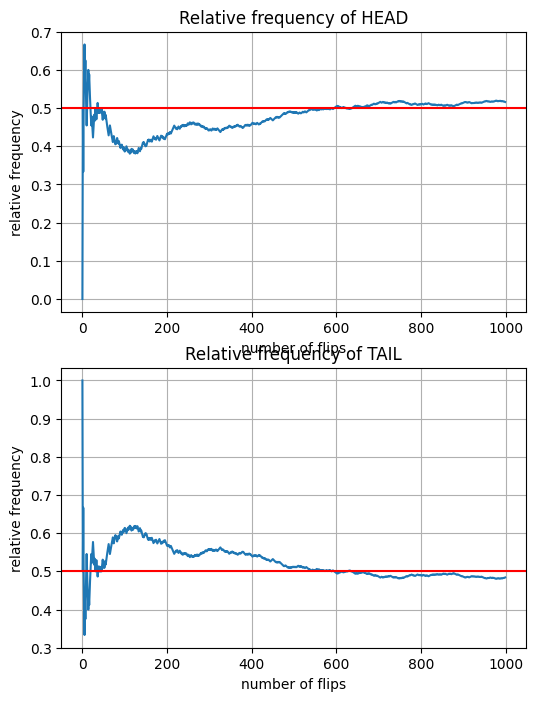

In [2]:
## 0 for head , 1 for tail
coin=[]
rel_freq_head=[]
rel_freq_tail=[]
head , tail = 0,0
for i in range (1,1001):
    flip =np.random.randint(2)
    coin.append(flip)
    if flip == 0 :
        head +=1
    else: 
        tail +=1
    rel_freq_head.append((head/i))
    rel_freq_tail.append((tail/i))

    
plt.figure(figsize=(6, 8))

plt.subplot(2,1,1)
plt.plot(range(1000) , rel_freq_head )
plt.grid()
plt.axhline(y=0.5, color= 'red')
plt.title('Relative frequency of HEAD')
plt.xlabel('number of flips')
plt.ylabel('relative frequency')

plt.subplot(2,1,2)
plt.plot(range(1000) , rel_freq_tail )
plt.grid()
plt.axhline(y=0.5, color= 'red')
plt.title('Relative frequency of TAIL')
plt.xlabel('number of flips')
plt.ylabel('relative frequency')


2. **Experiment:** Rolling a fair die, **Event:** Number 5 occurs.

In [105]:
import itertools
def rolling(n_of_dices=1):
    
    #simulating the roll event
    rolling_the_dice = 1000 
    return np.random.randint(1,7 , size=(rolling_the_dice ,  n_of_dices))


def frequency(condition, n=1 ):

    roll_list = rolling(n)
    relative_freq=[]
    freq = 0 
    i=0
    for roll in roll_list:
        i+= 1
        if condition(roll):
            freq += 1
        relative_freq.append(freq/(i))

    return relative_freq



def ideal_prob(condition , n ):
    num_of_possibilities = 6**n
    all_rolls = list(itertools.product(range(1, 7), repeat=n))
    j=0
    for i in (all_rolls):
        if condition(list(i)):
            j+=1
    return (j/ num_of_possibilities)
         


def plotting(condition , n=1):
    relative_freq=frequency(condition , n )
    line=ideal_prob(condition , n)
    
    plt.plot(range(1000 ), relative_freq)
    plt.xlabel('number of rolling the dice')
    plt.ylabel('relative frequency')
    plt.axhline(y=(line) , color='red')
    plt.grid()
    plt.show()




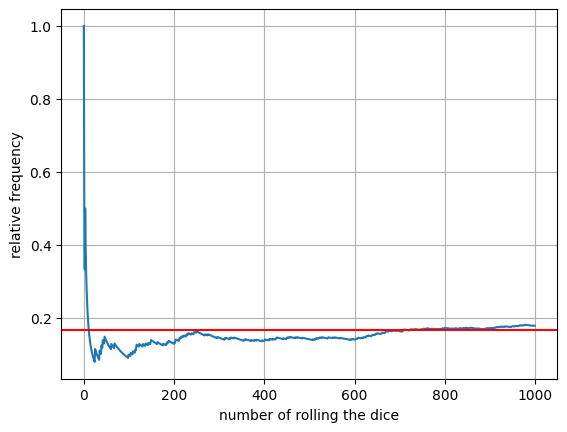

In [124]:
#for rolling dice equal 5

def condition_1(roll):
    return roll == [5]



plotting(condition_1 )

3. **Experiment:** Rolling a fair die, **Event:** A number greater than 3 occurs.

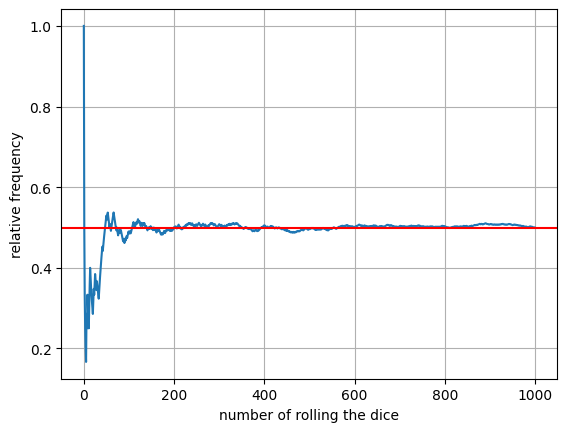

In [123]:
def condition_2(roll):
    return any(r in [4, 5, 6] for r in roll)


plotting(condition_2)

4. **Experiment:** Rolling two fair dice, **Event:** Sum of two dice equal 5.

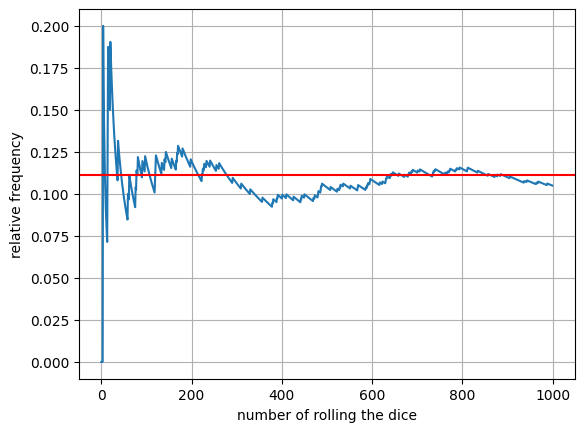

In [110]:
def condition_3(roll):
    return sum(roll) == 5

plotting(condition_3  , 2)

#### 5-my experiment : roll 2 dices , event: the two dices show the same face

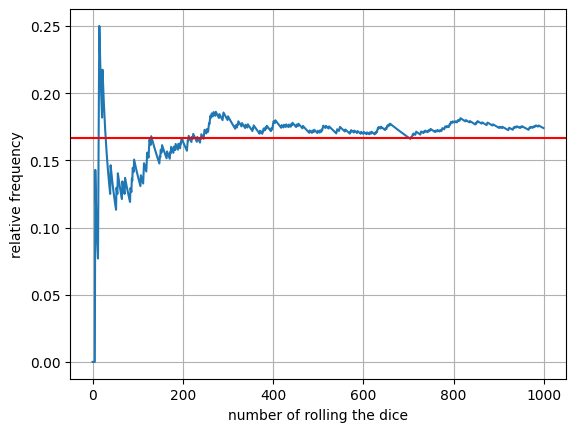

In [128]:
def condition_4(roll):
    return roll[0] == roll[1]

plotting(condition_4 , 2)

#### 6- Rolling 3 dices , event: the three dices show the same number

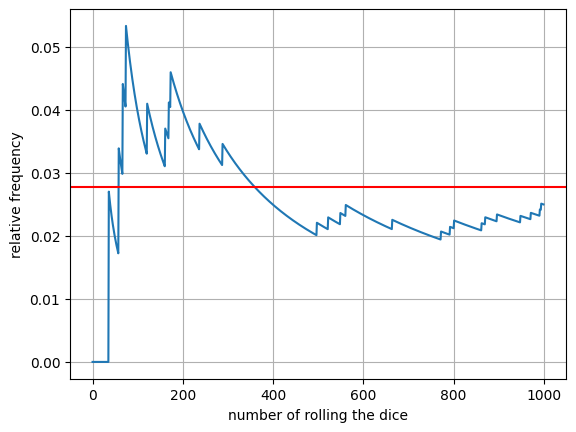

In [132]:
def condition_5(roll):
    return (roll[0] ==roll[1] == roll[2])

plotting(condition_5 , 3)

##### عظمة علي عظمة

# Problem 2

Simulate the experiment of tossing $1000$ times a coin with probability of **head (coded as $1$) equal to $0.4$** and probability of **tail (coded as $0$) equal to $0.6$**. How can you check if the simulation of the experiment of been running as expected.

**Hint**: Use [matplotlib.pyplot.hist¶
](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)

Text(0.5, 1.0, 'tossing the coin')

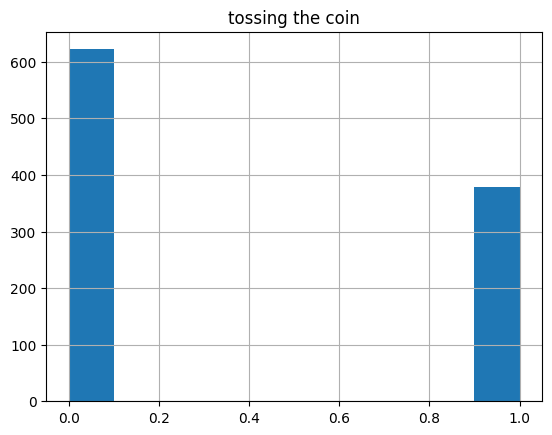

In [152]:
#type your code here:
def tossing_coin_controlled():
    coins= np.random.choice([0, 1], size=1000, p=[0.6, 0.4])   
    return coins

coins =tossing_coin_controlled()

plt.hist(coins)
plt.grid()
plt.title('tossing the coin')


# Problem 3: Independence

Use NumPy to create simulations and compute **empirical  probability** for the following outcomes. Compare the results with the **theoretical probability**.

1. Two fair coin flips produce exactly two heads

In [174]:
#type your code here:

# simulate 1 million tests of two fair coin flips
def tossing_coin(n_of_tosses, n_of_coins):
    coins= np.random.choice([0, 1], size=(n_of_tosses,n_of_coins))   
    return coins

coins_2 = tossing_coin(1000000 , 2)

# sums of all tests
coins_2= np.sum(coins_2 , axis = 1)

two_heads = np.count_nonzero(coins_2 == 2)
# proportion of tests that produced exactly two heads

prob_of_2_heads = two_heads/len(coins_2)
print('the probability of getting two head is eqaul:' , prob_of_2_heads)

the probability of getting two head is eqaul: 0.250015


2. Three fair coin flips produce exactly one head

In [175]:
#type your code here:

# simulate 1 million tests of three fair coin flips
coins_3 = tossing_coin(1000000 ,3)

# sums of all tests
coins_3= np.sum(coins_3 , axis = 1)

three_heads = np.count_nonzero(coins_3 == 3)

# proportion of tests that produced exactly one head
prob_of_3_heads = three_heads/len(coins_3)
print('the probability of getting three head is eqaul:' , prob_of_3_heads)

the probability of getting three head is eqaul: 0.125481


3. Three biased coin flips with P(H) = 0.6 produce exactly one head

In [210]:
#type your code here:

coins_biased= np.random.choice([0, 1], size=(1000,3), p=[0.4, 0.6])   
coins_biased= np.sum(coins_biased , axis = 1)
one_head = np.count_nonzero(coins_biased == 1)

prob_of_3_heads = one_head/len(coins_biased)
prob_of_3_heads

# simulate 1 million tests of three biased coin flips
# hint: use np.random.choice()


# sums of all tests


# proportion of tests that produced exactly one head


0.289

Problem 4:Random Variables Statistical Tools
Simulate Rolling a fair die $1000$ times. Then calculate the following:

- Sample mean
- Sample variance
- Sample standard deviation

Compare the results with the theoretical probability.

In [197]:

#type your code here:


## simulation
dices =rolling()
mean =np.mean(dices)
variance = np.var(dices)
std = np.std(dices)



### theoritical
posibilties= [1,2,3,4,5,6]
theoritical_mean = np.mean(posibilties)
theoritical_variance = np.var(posibilties)
theoritical_std = np.std(posibilties)


print(f"""
Sample mean: {mean}
Sample variance: {variance}
Sample standard deviation: {std}
{theoritical_mean}
{theoritical_variance}
{theoritical_std}
""")


Sample mean: 3.572
Sample variance: 2.912816
Sample standard deviation: 1.7066973955566933
3.5
2.9166666666666665
1.707825127659933



# Problem 5: Correlation and Covariance

The CSV file includes a hourly/daily summary for Szeged, Hungary area, between 2006 and 2016. After inspecting the data:

- Calculate the covariance and correlation coeffecient between temperature and apparent temperature
- Calculate the covariance and correlation coeffecient between temperature and humidity

In [198]:
df = pd.read_csv('weatherHistory.csv')
temperature = df['Temperature (C)'].to_numpy().reshape(-1, 1)
apparant_temp = df['Apparent Temperature (C)'].to_numpy().reshape(-1, 1)
humidity = df['Humidity'].to_numpy().reshape(-1, 1)

Text(0, 0.5, 'Apparent Temperature (C)')

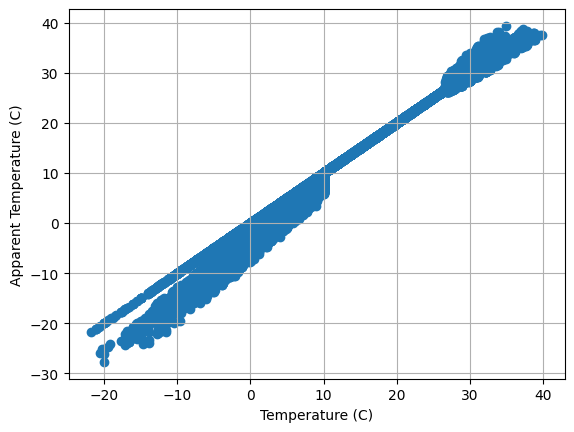

In [199]:
plt.scatter(temperature, apparant_temp)
plt.grid()
plt.xlabel('Temperature (C)')
plt.ylabel('Apparent Temperature (C)')

Text(0, 0.5, 'Temperature (C)')

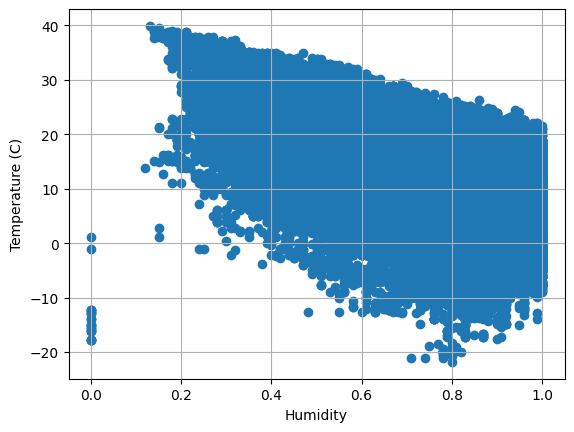

In [200]:
plt.scatter(humidity, temperature)
plt.grid()
plt.xlabel('Humidity')
plt.ylabel('Temperature (C)')

## Temperature and Apparent Temperature

In [206]:
df.corr()

,Temperature (C),Apparent Temperature (C),Humidity
Temperature (C),1.000000,0.992629,-0.632255
Apparent Temperature (C),0.992629,1.000000,-0.602571
Humidity,-0.632255,-0.602571,1.000000


In [207]:
df.cov()

,Temperature (C),Apparent Temperature (C),Humidity
Temperature (C),91.232037,101.418283,-1.180462
Apparent Temperature (C),101.418283,114.422544,-1.259941
Humidity,-1.180462,-1.259941,0.038210


In [14]:
#type your code here:



Covariance:  [[101.41828319]]
---------------------------------------------------
np.cov(): 
 [[ 91.23203712 101.41828319]
 [101.41828319 114.42254413]]
---------------------------------------------------
Correlation Cof:  [[0.99262856]]
---------------------------------------------------
np.corrcoef(): 
 [[1.         0.99262856]
 [0.99262856 1.        ]]


## Temperature and Humidity

In [15]:
#type your code here:


Covariance:  [[-1.18046179]]
---------------------------------------------------
np.cov(): 
 [[ 9.12320371e+01 -1.18046179e+00]
 [-1.18046179e+00  3.82095917e-02]]
---------------------------------------------------
Correlation Cof:  [[-0.63225468]]
---------------------------------------------------
np.corrcoef(): 
 [[ 1.         -0.63225468]
 [-0.63225468  1.        ]]
